강남대 201904209 산업데이터사이언스 서명훈

# 이동 통신 사용자 데이터 분석

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
telco = pd.read_csv('telco.csv')

이동 통신 사용자 데이터

In [4]:
telco

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


먼저 모든 변수의 상관관계를 살펴봐야합니다.

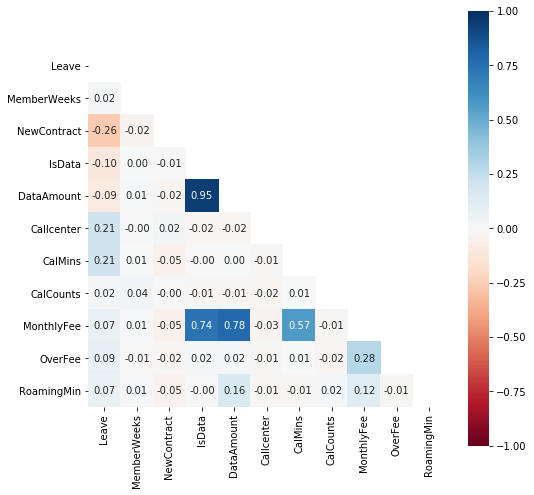

In [29]:
# 모든 변수 상관관계
fig, ax = plt.subplots(figsize=(8, 8))
corr = telco[['Leave', 'MemberWeeks', 'NewContract', 'IsData',
            'DataAmount', 'Callcenter', 'CalMins', 'CalCounts',
            'MonthlyFee', 'OverFee', 'RoamingMin']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr,
    mask=mask,
    fmt='.2f',
    annot=True,
    ax=ax,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square=True
)

#### 상관관계가 있는 것  
데이터사용량 - 월평균요금, 로밍"시간, 데이터요금제사용  
월평균요금 - 데이터요금제사용, 데이터사용량, 월평균전화량, 초과요금, 로밍시간

스캐터 등을 통해 자세히 살펴보겠습니다.

#### 데이터사용량 x 월평균요금  
데이터를 많이 사용하는 사람이 요금을 많이 낸다

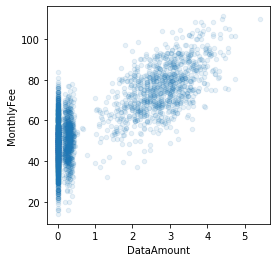

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))
telco.plot.scatter(
    x='DataAmount',
    y='MonthlyFee',
    alpha=.1,
    ax=ax
)

#### 월평균전화량 x 월평균요금
전화를 많이 하는 사람이 요금을 많이 낸다

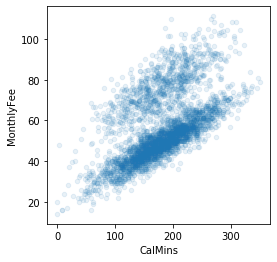

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
telco.plot.scatter(
    x='CalMins',
    y='MonthlyFee',
    alpha=.1,
    ax=ax
)

#### 데이터 요금제 사용 x 월평균요금
데이터 요금제를 사용하는 사람이 요금을 많이 낸다

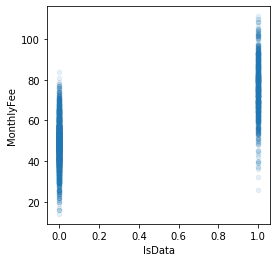

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
telco.plot.scatter(
    x='IsData',
    y='MonthlyFee',
    alpha=.1,
    ax=ax
)

#### 데이터사용량과 월평균요금 분포표
데이터를 사용하지 않고 요금이 70까지 많이 나오는 사람들이 많은 것을 알 수 있습니다.

In [9]:
(
telco.reset_index().pivot_table(index = pd.cut(telco.DataAmount, list(range(-1,7))),
                         columns = pd.cut(telco.MonthlyFee, list(range(10,130,10))),
                         values = 'index',
                         aggfunc = 'count')
    .fillna(0)
    .astype(int)
    .style.highlight_max(axis=0)
)

MonthlyFee,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]","(110, 120]"
DataAmount,,,,,,,,,,,
"(-1, 0]",6,74,336,655,525,184,31,2,0,0,0
"(0, 1]",2,11,73,201,223,82,15,0,0,0,0
"(1, 2]",0,0,3,6,34,52,27,7,2,0,0
"(2, 3]",0,0,1,6,32,123,147,93,30,1,0
"(3, 4]",0,0,0,0,3,41,88,103,54,18,0
"(4, 5]",0,0,0,0,0,0,4,9,16,11,1
"(5, 6]",0,0,0,0,0,0,0,0,0,1,0


#### 데이터사용량과 월평균요금의 월평균전화량 분포표
월평균전화량 분포를 보니 데이터를 사용하지 않는 사람들은 전화량이 많은 것을 볼 수 있습니다.

In [9]:
(
telco.reset_index().pivot_table(index = pd.cut(telco.DataAmount, list(range(-1,7))),
                         columns = pd.cut(telco.MonthlyFee, list(range(10,130,10))),
                         values = 'CalMins',
                         aggfunc = 'mean')
    .fillna(0)
    .astype(int)
    .style.highlight_max(axis=0)
)

MonthlyFee,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]","(110, 120]"
DataAmount,,,,,,,,,,,
"(-1, 0]",30,81,123,168,212,259,303,339,0,0,0
"(0, 1]",3,54,109,152,197,245,283,0,0,0,0
"(1, 2]",0,0,38,91,140,179,215,256,315,0,0
"(2, 3]",0,0,19,47,106,145,189,227,260,286,0
"(3, 4]",0,0,0,0,52,104,150,191,226,277,0
"(4, 5]",0,0,0,0,0,0,115,141,196,230,268
"(5, 6]",0,0,0,0,0,0,0,0,0,196,0


#### 가입 해지 별로 갱신 여부
가입 갱신이 가장 많고 갱신된 사람 중 해지한 사람이 많다.

In [21]:
(
telco.reset_index().pivot_table(index = 'Leave',
                         columns = 'NewContract',
                         values = 'index',
                         aggfunc = 'count')
    .rename(
        index={
            0:'가입',
            1:'해지'
        },
        columns={
            0:'비갱신',
            1:'갱신'})
)

NewContract,비갱신,갱신
Leave,,
가입,186,2664
해지,137,346


#### 종합별(데이터요금제사용여부, 가입해지여부, 가입갱신여부)에 따른 월평균전화량 분포표
2~4시간에 몰려있음을 알 수 있습니다.

In [19]:
(
telco.reset_index().pivot_table(index = [telco.IsData, telco.Leave, telco.NewContract],
                         columns = pd.cut(telco.CalMins, list(range(0,500,60))),
                         values = 'index',
                         aggfunc = 'count')
    .fillna(0)
    .astype(int)
    .style.highlight_max(axis=1)
)

#### 종합별 월평균전화량에 따른 데이터사용량 분포표
월평균전화량이 2-4시간에 몰려있음에도 불구하고 데이터사용량은 2-4시간과 다른 시간들이 비슷하고, 다른 시간에 오히려 평균데이터사용량이 많습니다.  
데이터사용O 중 해지한 사람들은 갱신한 사람보다 평균데이터사용량이 많습니다. 그리고 전화를 덜 사용합니다.

In [18]:
(
telco.reset_index().pivot_table(index = [telco.IsData, telco.Leave, telco.NewContract],
                         columns = pd.cut(telco.CalMins, list(range(0,500,60))),
                         values = 'DataAmount',
                         aggfunc = 'mean')
    .fillna(0)
    .round(3)
    .style.highlight_max(axis=1)
)

#### 종합별 데이터사용량에 따른 월평균전화량 분포표
데이터요금제X 중 해지한 사람이 전화를 더 많이합니다.  
데이터요금제O 중 해지한 사람이 평균데이터사용량이 많고 전화도 많이 합니다.

In [52]:
(
telco.reset_index().pivot_table(index = [telco.IsData, telco.Leave, telco.NewContract],
                         columns = pd.cut(telco.DataAmount, list(range(-1,7))),
                         values = 'CalMins',
                         aggfunc = 'mean')
    .fillna(0)
    .astype(int)
    .style.highlight_max(axis=1)
)

#### 종합별 가입기간 분포표
(한달을 약 4주로 잡을때 4주 x 12달 = 48주 + 여유 2주 = 50주 = 1년으로 환산)  
대부분 1-3년동안 가입합니다

In [20]:

(
telco.reset_index().pivot_table(index = ['Leave', 'NewContract'],
                         columns = pd.cut(telco.MemberWeeks, list(range(0,260,50))),
                         values = 'index',
                         aggfunc = 'count')
    .fillna(0)
    .astype(int)
    .style.highlight_max(axis=1)
)

#### 데이터사용량과 월평균전화량에 따른 로밍시간 분포표
데이터사용량이 많으면 로밍시간도 많습니다. 전화량에는 관여하지 않습니다.

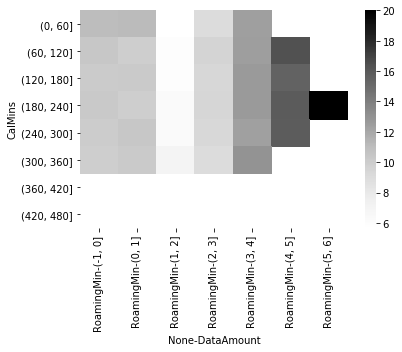

In [52]:
func = [pd.cut(telco.CalMins, list(range(0,500,60))), pd.cut(telco.DataAmount, list(range(-1,7)))]

table = (
 telco.groupby(func)
 [['RoamingMin']]
 .mean()
 .unstack()
 #.style.highlight_max(color='lightgrey')
)
sns.heatmap(table, cmap='Greys')


## 분석 결과 및 마케팅 서비스 제의

1 해지를 한 사람들은 데이터와 전화를 많이 쓰거나(데이터요금제사용자) 전화를 많이 썼습니다.(데이터요금제미사용자)
- 고객 가입을 위해서 데이터와 전화량을 많이 제공하고 가격이 싼 프로모션 진행 필요

2 가입기간도 1-3년이 대부분이라 가입기간을 더 길게 잡아야 할 것입니다.
- 가입 장기간 혜택 필요

3 데이터량 1-3GB 사용하고 전화량 5-6시간 사용하는 사람들은 가입기간이 깁니다. = 현재 가입에 만족한다는 뜻
- 데이터량은 적지만 전화량을 많이 제공하는 요금제 행사 진행 필요

4 데이터를 많이 사용하는 사람이 로밍도 많이 사용한다.
- 로밍혜택 필요